### ML: Classification

Predict: survival of passengers from shipwreck

<br>

#### Import packages

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<br>

#### Data dictionary

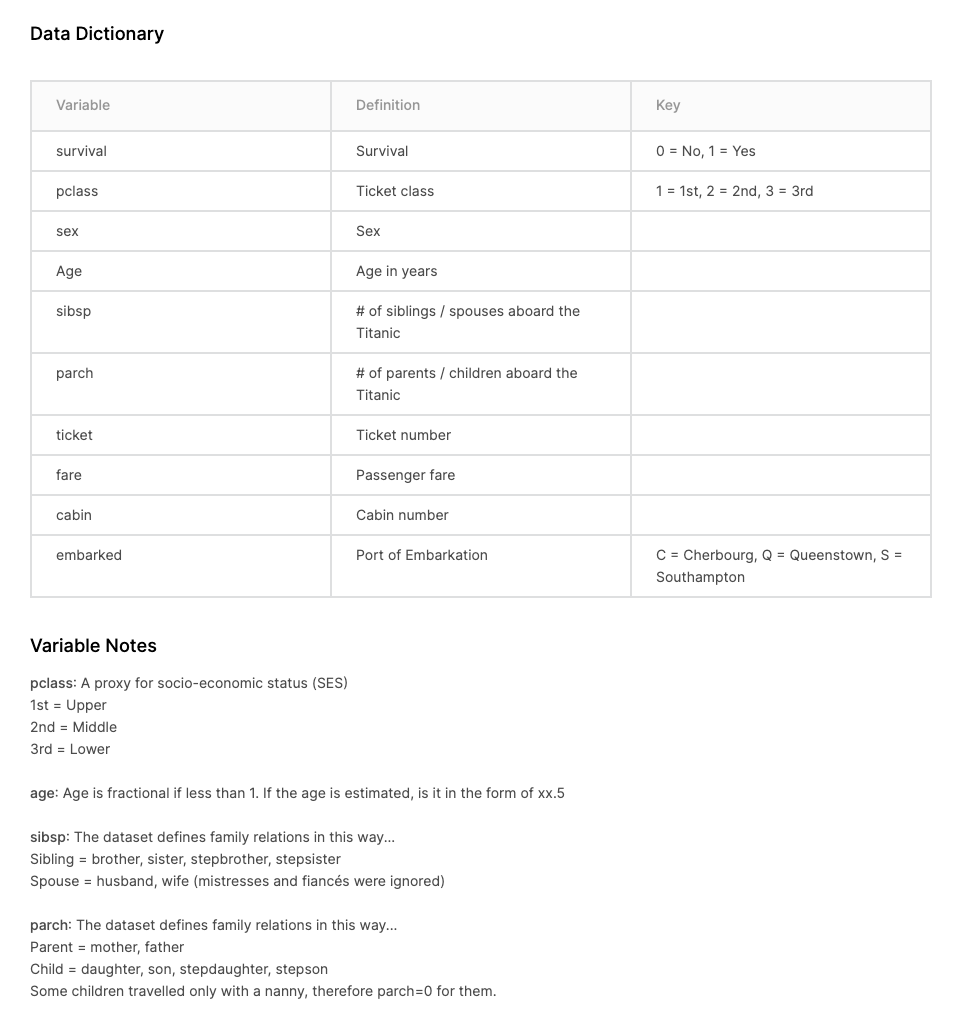

In [2]:
from IPython.display import Image
Image(filename='data/titanic_datanotes.png') 

<br>

#### Load dataset

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<br>

#### Check label distribution

In [5]:
train["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<div class="mark">
I'm not sure if this is balanced but for now I will treat that it is. Will go back to check against references.</div><i class="fa fa-lightbulb-o "></i>

<br>

#### Check missing data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- age, cabin and embarked with missing values

#### Create additional columns

In [7]:
train.loc[train['Cabin'].isnull(), 'With_Cabin'] = 0
train.loc[~train['Cabin'].isnull(), 'With_Cabin'] = 1
train.loc[train['Pclass']==3, 'Pclass_inverted'] = 1
train.loc[train['Pclass']==2, 'Pclass_inverted'] = 2
train.loc[train['Pclass']==1, 'Pclass_inverted'] = 3
train["Family_Size"] = train["SibSp"]+train["Parch"]
train.loc[train['Family_Size']>=1, 'With_Family'] = 1
train.loc[train['Family_Size']==0, 'With_Family'] = 0
train.loc[train['SibSp']==0, 'With_SibSp'] = 0
train.loc[train['SibSp']!=0, 'With_SibSp'] = 1
train.loc[train['Parch']==0, 'With_Parch'] = 0
train.loc[train['Parch']!=0, 'With_Parch'] = 1

#### Checking features versus label

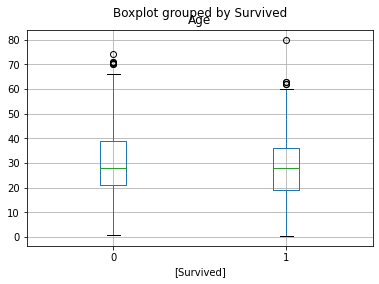

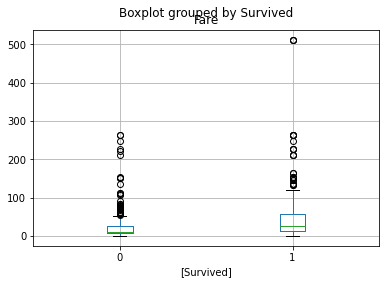

In [8]:
# numerical features

cols_numerical = ["Age", "Fare"]
col_target = "Survived"

for c_n in cols_numerical:
    train[[c_n, col_target]].boxplot(by=[col_target])

- younger people survived more
- higher fare survived more

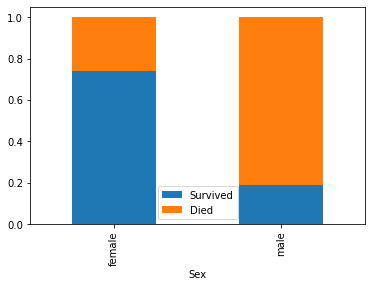

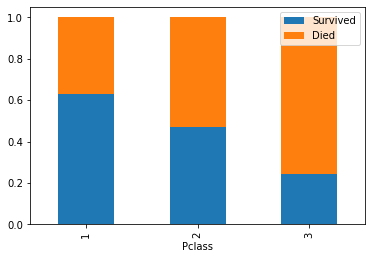

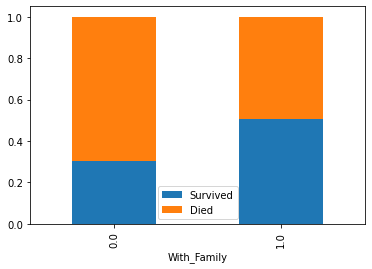

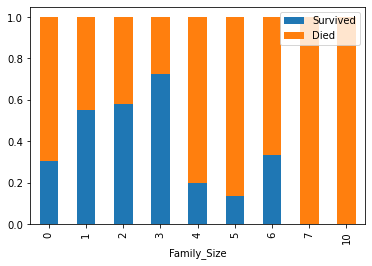

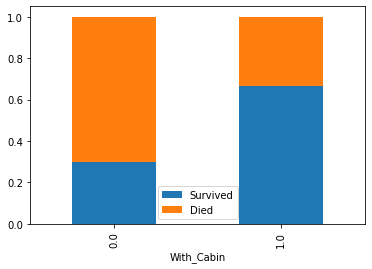

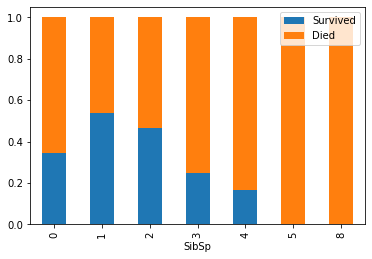

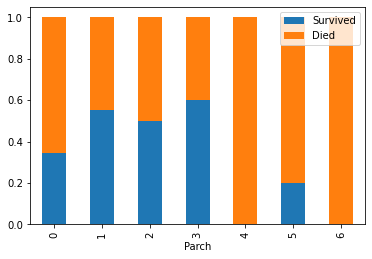

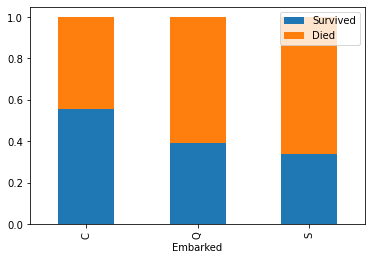

In [9]:
# categorical features

cols_categorical = ["Sex", "Pclass", "With_Family", "Family_Size", "With_Cabin", "SibSp", "Parch", "Embarked"]
col_target = "Survived"

for c_c in cols_categorical:
    train_g = train.groupby([c_c])['Survived'].agg([np.mean, lambda x: 1-np.mean(x)])
    train_g.columns = ['Survived', 'Died']
    train_g.plot.bar(stacked=True)

- female survived more
- higher pclass survived more
- people without family survived more
- lower family size (<4) survived more; family size 7 and 10 all died
- people with cabin survived more
- people who embarked on cherbrough survived more

<br>

#### Create additional columns

In [10]:
train.loc[train['Family_Size']<7, 'Family_Size_<7'] = 1
train.loc[train['Family_Size']>=7, 'Family_Size_<7'] = 0
train.loc[train['Family_Size']<4, 'Family_Size_<4'] = 1
train.loc[train['Family_Size']>=4, 'Family_Size_<4'] = 0
train.loc[train['Age']<=16, 'Child'] = 1
train.loc[train['Age']>16, 'Child'] = 0

In [11]:
# surnames
train["surname"] = train["Name"].apply(lambda x: x.split(",")[0])
surname_grouped = train.groupby(["surname", "Survived"])["PassengerId"].count().reset_index(name="count_passengers")

surname_pivoted = surname_grouped.pivot(index='surname', columns='Survived', values='count_passengers')
surname_flattened = pd.DataFrame(surname_pivoted.to_records())
surname_flattened.columns = ["surname", "family_dead", "family_survived"]
surname_flattened.fillna(0, inplace=True)
surname_flattened["family_total"] = surname_flattened["family_survived"] + surname_flattened["family_dead"]
surname_flattened.loc[surname_flattened['family_dead']>=3, 'surname_alldied'] = 1
surname_flattened.loc[surname_flattened['family_dead']<3, 'surname_alldied'] = 0
surname_flattened.loc[(surname_flattened['family_total']>=3)&(surname_flattened['family_survived']>=1), 'surname_onelived'] = 1
surname_flattened.fillna(0, inplace=True)
surname_flattened.head(20)

,surname,family_dead,family_survived,family_total,surname_alldied,surname_onelived
0,Abbing,1.0,0.0,1.0,0.0,0.0
1,Abbott,1.0,1.0,2.0,0.0,0.0
2,Abelson,1.0,1.0,2.0,0.0,0.0
3,Adahl,1.0,0.0,1.0,0.0,0.0
4,Adams,1.0,0.0,1.0,0.0,0.0
5,Ahlin,1.0,0.0,1.0,0.0,0.0
6,Aks,0.0,1.0,1.0,0.0,0.0
7,Albimona,0.0,1.0,1.0,0.0,0.0
8,Alexander,1.0,0.0,1.0,0.0,0.0
9,Alhomaki,1.0,0.0,1.0,0.0,0.0


In [12]:
train = train.merge(surname_flattened)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Cabin,Pclass_inverted,Family_Size,With_Family,With_SibSp,With_Parch,Family_Size_<7,Family_Size_<4,Child,surname,family_dead,family_survived,family_total,surname_alldied,surname_onelived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Braund,2.0,0.0,2.0,0.0,0.0
1,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,0.0,1.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Braund,2.0,0.0,2.0,0.0,0.0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,3.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Cumings,0.0,1.0,1.0,0.0,0.0
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0,0.0,0.0,0.0,1.0,1.0,0.0,Heikkinen,0.0,1.0,1.0,0.0,0.0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,3.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Futrelle,1.0,1.0,2.0,0.0,0.0


<br>

#### Check missing values (no imputer yet)

In [13]:
age_null = train[train["Age"].isnull()]
age_notnull = train[~train["Age"].isnull()]
age_notnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Cabin,Pclass_inverted,Family_Size,With_Family,With_SibSp,With_Parch,Family_Size_<7,Family_Size_<4,Child,surname,family_dead,family_survived,family_total,surname_alldied,surname_onelived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Braund,2.0,0.0,2.0,0.0,0.0
1,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,0.0,1.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Braund,2.0,0.0,2.0,0.0,0.0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,3.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Cumings,0.0,1.0,1.0,0.0,0.0
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0,0.0,0.0,0.0,1.0,1.0,0.0,Heikkinen,0.0,1.0,1.0,0.0,0.0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,3.0,1,1.0,1.0,0.0,1.0,1.0,0.0,Futrelle,1.0,1.0,2.0,0.0,0.0


<br>

#### Encode categorical features

In [14]:
encoder = OneHotEncoder()
data_onehotencoded_list = [train]
for column in ["Sex", "Embarked", "Pclass"]:
    train_encoded_array = encoder.fit_transform(train[[column]].to_numpy()).toarray()
    train_encoded = pd.DataFrame(train_encoded_array, columns = [column+"_"+x.split("_")[-1] for x in encoder.get_feature_names()])
    data_onehotencoded_list.append(train_encoded)
train_onehotencoded_ = reduce(lambda left, right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), data_onehotencoded_list)

In [15]:
train_onehotencoded = train_onehotencoded_
# [[
#     "Survived", "Age", "SibSp", "Parch", "Fare",
#     "With_Cabin", 
#     "Pclass",
#     "Pclass_inverted",
#     "Pclass_1", "Pclass_2", "Pclass_3",
#     "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Embarked_nan",
#     "With_SibSp", "With_Parch",
#     "Family_Size",
# ]]

<br>

#### Remove missing values

In [16]:
train_onehotencoded_nonull = train_onehotencoded[~train_onehotencoded["Age"].isnull()]

<br>

#### Check feature importance

In [17]:
train_onehotencoded_nonull.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'With_Cabin',
 'Pclass_inverted',
 'Family_Size',
 'With_Family',
 'With_SibSp',
 'With_Parch',
 'Family_Size_<7',
 'Family_Size_<4',
 'Child',
 'surname',
 'family_dead',
 'family_survived',
 'family_total',
 'surname_alldied',
 'surname_onelived',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_nan',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [18]:
target_label = ["Survived"]
categorical_features = ["PassengerId" ,"Ticket", "Name", "Cabin", "Sex", "Embarked", "surname"]
not_features = target_label+categorical_features
feature_names = [f_n for f_n in train_onehotencoded_nonull.columns.tolist() if f_n not in not_features]

X_train = train_onehotencoded_nonull[feature_names].to_numpy()
y_train = train_onehotencoded_nonull[target_label].to_numpy()

from sklearn.feature_selection import f_classif
f_value = f_classif(X_train, y_train)
f_value_sorted = sorted([f for f in zip(feature_names, f_value[0])], key=lambda x: x[1])
f_value_sorted.reverse()
for feature in f_value_sorted:
    print(feature)

('family_survived', 530.4175622260602)
('Sex_male', 291.28748518994996)
('Sex_female', 291.2874851899498)
('family_dead', 215.35190506478628)
('Pclass_inverted', 105.77986826578089)
('Pclass', 105.77986826578089)
('Pclass_3', 91.58019261678676)
('With_Cabin', 83.81480853585845)
('Pclass_1', 71.36621891143609)
('Fare', 55.179487618600994)
('surname_alldied', 42.43211646034106)
('With_Family', 28.48733817431646)
('Embarked_C', 27.72768947007629)
('With_Parch', 19.79090020137499)
('Embarked_S', 19.73727609513281)
('surname_onelived', 14.75962792962673)
('Family_Size_<4', 10.165103618066203)
('Child', 10.087851959072262)
('With_SibSp', 6.921438430478518)
('Parch', 6.254607038960784)
('Pclass_2', 5.151366646841307)
('Age', 4.271194933816835)
('Family_Size_<7', 4.151019259370762)
('Embarked_nan', 2.936196700902583)
('Embarked_Q', 1.7523243633207792)
('family_total', 1.6504852683153066)
('Family_Size', 1.3058716063417346)
('SibSp', 0.21459928860513625)


/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
feature_names

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'With_Cabin',
 'Pclass_inverted',
 'Family_Size',
 'With_Family',
 'With_SibSp',
 'With_Parch',
 'Family_Size_<7',
 'Family_Size_<4',
 'Child',
 'family_dead',
 'family_survived',
 'family_total',
 'surname_alldied',
 'surname_onelived',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_nan',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

#### Convert to array

In [20]:
y_train = train_onehotencoded_nonull["Survived"].to_numpy()
X_train = train_onehotencoded_nonull[[
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
    'With_Cabin', 'Pclass_inverted', 'Family_Size', 'With_Family', 'With_SibSp',
    'With_Parch', 'Family_Size_<7', 'Family_Size_<4', 'Child', 'family_dead',
    'family_survived', 'family_total','Sex_female',
    'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
    'Pclass_1', 'Pclass_2', 'Pclass_3']].to_numpy()

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=100)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=200)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features=None, min_samples_leaf=15
                              )
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=0.025, random_state=101)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
from numpy import mean

In [22]:
model_dict = {
    "rfm": rfm,
    "lr": lr,
    "nb": nb,
    "sgd": sgd,
    "knn": knn,
    "dtree": dtree,
    "svm": svm,
    "mlp": mlp
}
for k,v in model_dict.items():
    m1 = cross_val_score(v, X_train, y_train, cv=5, scoring="accuracy")
    print(k)
    print(mean(m1), min(m1), max(m1))

rfm
0.9622377622377624 0.8741258741258742 1.0


/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

lr
0.9496011031222299 0.9090909090909091 0.9790209790209791
nb
0.7662661282379591 0.5664335664335665 0.8802816901408451
sgd
0.8639416921107061 0.7183098591549296 0.958041958041958
knn
0.7017925736235596 0.5314685314685315 0.7832167832167832
dtree
0.958041958041958 0.9020979020979021 1.0
svm
0.9538363045405298 0.9090909090909091 0.9929577464788732
mlp
0.9664335664335664 0.9300699300699301 1.0


Read things online, and saw that some are using surnames? How is that relevant to this? Apparently it pushes the models to 90+%